In [9]:
import os
import torch
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '../'))

import numpy as np
import matplotlib.pyplot as plt

from engine.solver import Trainer
from Utils.metric_utils import visualization
from Data.build_dataloader import build_dataloader
from Utils.io_utils import load_yaml_config, instantiate_from_config
from Models.interpretable_diffusion.model_utils import unnormalize_to_zero_to_one

In [7]:
train_data_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\Diffusion-TS-main\OUTPUT\test\samples\sine_ground_truth_24_train.npy'
test_data_path = r'C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\Diffusion-TS-main\OUTPUT\test\ddpm_fake_test.npy'


# Loading the .npy files
ori_data = np.load(train_data_path)  # Example of loading train dataset
fake_data = np.load(test_data_path)   # Example of loading test dataset

# Display the first few lines (e.g., first 5) of both datasets

print(ori_data[:3])
print(fake_data[:3])
print(ori_data.shape)
print(fake_data.shape)

[[[0.51430501 0.52755178 0.52114901 0.53421473 0.51960085]
  [0.5490514  0.53886906 0.55700455 0.58289517 0.54359704]
  [0.58355996 0.55016633 0.59256514 0.63077889 0.5674924 ]
  [0.61766335 0.56143779 0.62764679 0.67740565 0.5912317 ]
  [0.65119622 0.57267764 0.66206798 0.72232732 0.61476001]
  [0.68399599 0.58388009 0.69565061 0.76511214 0.63802294]
  [0.7159036  0.59503937 0.72822092 0.8053489  0.6609667 ]
  [0.74676436 0.60614975 0.75961038 0.84265086 0.68353821]
  [0.77642862 0.6172055  0.78965659 0.87665951 0.7056853 ]
  [0.80475256 0.62820094 0.81820408 0.90704798 0.72735673]
  [0.83159883 0.63913041 0.84510514 0.9335242  0.7485024 ]
  [0.85683726 0.64998828 0.87022059 0.9558337  0.7690734 ]
  [0.88034549 0.66076897 0.89342047 0.97376205 0.78902217]
  [0.90200953 0.67146692 0.91458474 0.98713695 0.80830258]
  [0.92172432 0.68207665 0.9336039  0.99582984 0.82687003]
  [0.93939429 0.69259267 0.95037954 0.99975717 0.84468159]
  [0.95493376 0.70300959 0.96482486 0.9988812  0.8616960

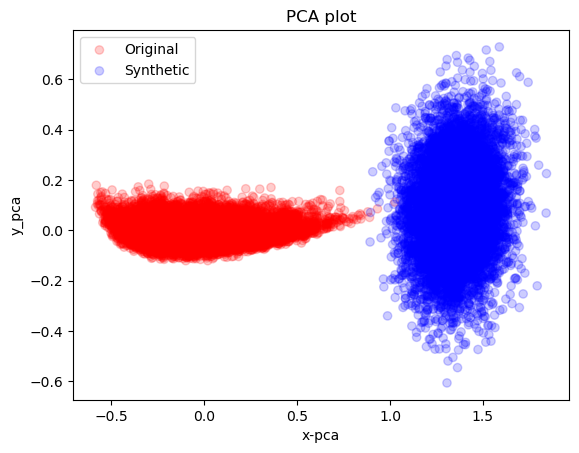

In [4]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='pca', compare=ori_data.shape[0])

C:\Users\chris\anaconda3\envs\MACode_Diffusion-ts\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\chris\anaconda3\envs\MACode_Diffusion-ts\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.000s...
[t-SNE] Computed neighbors for 20000 samples in 0.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

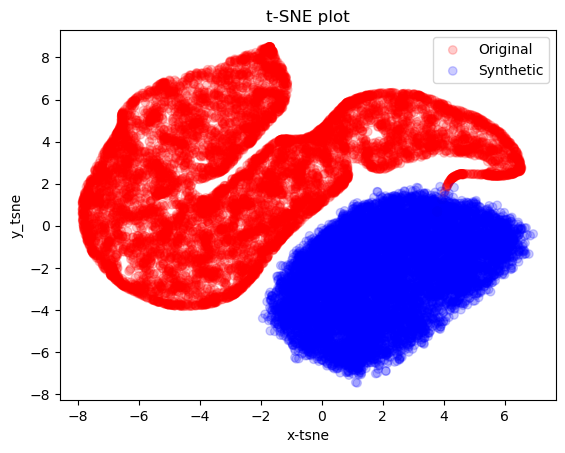

In [5]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='tsne', compare=ori_data.shape[0])

C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\Diffusion-TS-main\Experiments\..\Utils\metric_utils.py:157: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prep_data, hist=False, kde=True, kde_kws={'linewidth': 5}, label='Original', color="red")
C:\Nextcloud\Uni\Uni LE\Masterarbeit\MACode\Diffusion-TS-main\Experiments\..\Utils\metric_utils.py:158: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use

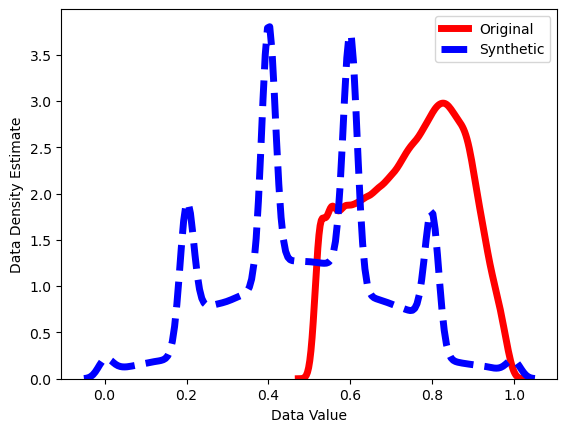

In [6]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='kernel', compare=ori_data.shape[0])

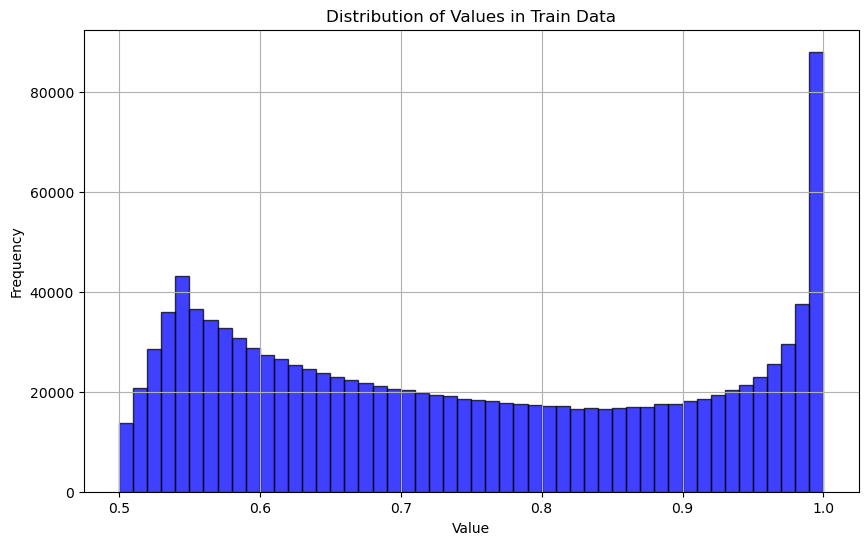

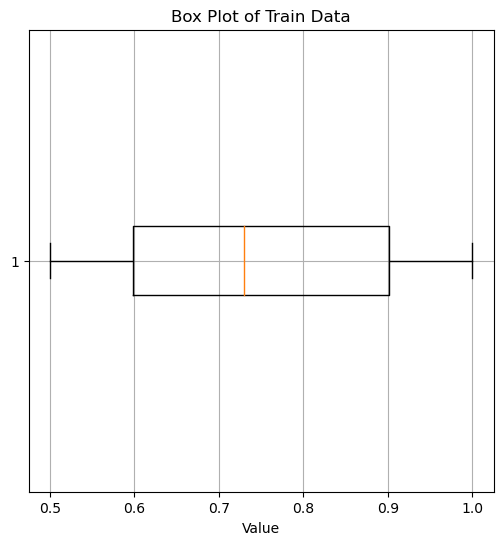

In [10]:
# Flatten the train data in case it has more than 1 dimension
ori_data_flat = ori_data.flatten()

# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(ori_data_flat, bins=50, alpha=0.75, color='b', edgecolor='black')
plt.title('Distribution of Values in Train Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot to show statistical distribution
plt.figure(figsize=(6, 6))
plt.boxplot(ori_data_flat, vert=False)
plt.title('Box Plot of Train Data')
plt.xlabel('Value')
plt.grid(True)
plt.show()